## MOVIE RECOMMENDATION SYSTEM

* In this project, I designed a program that suggests the most appropriate 5 movies to the user, if a movie is given to the system as an input. 


* The best movies to recommend are chosen using a cumulative score obtained from the Jaccard Similarity and the Cosine Similarity. The Jaccard Similarity is used to compute similarity between each movie pair using genres of the movies. The Cosine Similarity is useful to determine similarity between movies with regard to the given ratings. 


* It is very crucial to assess the similarity between movies in different perspectives. Not only genres of a movie but also ratings of the movies can be a characteristic features to catch the similarity. Thus, I prefer using both of them to determine to be recommended movie. Jaccard Similarity Score is on 0 and 1.  Normally, Cosine Similarity Score is on -1 and 1. However, in this case, cosine scores come between 0 and 1. So, there is no need to adjust scores to the positive value.

In [163]:
import pandas as pd
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import sys

import warnings
warnings.filterwarnings("ignore")

In [164]:
movieId = 1

In [165]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [166]:
ratings.shape

(100836, 4)

In [167]:
# check if a user rate for a movie more than one time 
temp = pd.DataFrame(ratings.groupby(['userId','movieId'])['timestamp'].value_counts())
temp.head(2)

timestamp
userId movieId timestamp           
1      1       964982703          1
       3       964981247          1

In [168]:
# check if a user rate for a movie more than one time : NO
temp['timestamp'].unique()

array([1])

In [169]:
links = pd.read_csv('ml-latest-small/links.csv')
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [170]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [171]:
if movieId not in movies['movieId'].unique():
    print(f'Entered movieId ({movieId}) is not included in the movie list. Program will be ended.')
    sys.exit()

In [172]:
movie_names_ids_dict = dict(zip(movies.title, movies.movieId))
movie_ids_names_dict = dict(zip(movies.movieId, movies.title))

In [173]:
tags = pd.read_csv('ml-latest-small/tags.csv')
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [174]:
tags['movieId'].nunique()

1572

In [175]:
movies['genres_list'] = movies.genres.str.split('|')

In [176]:
movies

,movieId,title,genres,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),Drama,[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Action, Animation]"


In [177]:
# compute jaccard similarity between movies according to genres
def jaccard_similarity(genres1, genres2):

    s1 = set(genres1)
    s2 = set(genres2)
    
    return float(len(s1.intersection(s2))/len(s1.union(s2)))

In [178]:
# create a combination matrix for all movie pairs
def create_product_matrix(col1, col2):
    
    prod = product(col1, col2)
    combinations = pd.DataFrame(list(prod),columns = ['movieId1','movieId2'])
    
    return combinations

In [179]:
movies_list = movies['movieId'].unique()
movies = movies.set_index('movieId')
jaccard_sim = {}

for mov in movies_list:
    jaccard_sim[mov] = jaccard_similarity(movies.loc[movieId, :]['genres_list'],movies.loc[mov, :]['genres_list'])

In [180]:
jaccard_sim

{1: 1.0,
 2: 0.6,
 3: 0.16666666666666666,
 4: 0.14285714285714285,
 5: 0.2,
 6: 0.0,
 7: 0.16666666666666666,
 8: 0.4,
 9: 0.0,
 10: 0.14285714285714285,
 11: 0.14285714285714285,
 12: 0.16666666666666666,
 13: 0.6,
 14: 0.0,
 15: 0.14285714285714285,
 16: 0.0,
 17: 0.0,
 18: 0.2,
 19: 0.2,
 20: 0.1111111111111111,
 21: 0.14285714285714285,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.16666666666666666,
 28: 0.0,
 29: 0.25,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 34: 0.16666666666666666,
 36: 0.0,
 38: 0.4,
 39: 0.16666666666666666,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.3333333333333333,
 45: 0.14285714285714285,
 46: 0.0,
 47: 0.0,
 48: 0.25,
 49: 0.0,
 50: 0.0,
 52: 0.14285714285714285,
 53: 0.16666666666666666,
 54: 0.4,
 55: 0.0,
 57: 0.0,
 58: 0.14285714285714285,
 60: 0.6,
 61: 0.0,
 62: 0.0,
 63: 0.16666666666666666,
 64: 0.16666666666666666,
 65: 0.2,
 66: 0.0,
 68: 0.16666666666666666,
 69: 0.2,
 70: 0.125,
 71: 0.0,
 72: 0.16666666666666666,
 73: 0.0,
 74: 0.0,
 

In [181]:
# Jaccard scores extend between the interval of 0 and 1
jaccard_sim[min(jaccard_sim, key=jaccard_sim.get)], jaccard_sim[max(jaccard_sim, key=jaccard_sim.get)]

(0.0, 1.0)

In [182]:
jaccard_sim = pd.DataFrame(data = jaccard_sim.items(), columns = ['movieId2','jaccard_sim_score'])

In [183]:
movies = movies.reset_index()

In [184]:
related_movie = movies[movies['movieId'] == movieId]

In [185]:
# Create a combination matrix having dimensions of [1 X (# of movies)]
movie_pairs_mat = create_product_matrix(related_movie['movieId'], jaccard_sim['movieId2'])
movie_pairs_mat.head()

,movieId1,movieId2
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [186]:
movie_pairs_mat = movie_pairs_mat.merge(related_movie, left_on = 'movieId1', right_on = 'movieId', how = 'left')
movie_pairs_mat = movie_pairs_mat.merge(jaccard_sim, on = 'movieId2', how = 'left')
movie_pairs_mat.drop(columns = {'genres','movieId'}, inplace = True)

In [187]:
# compute the cosine similarity between movies according to user ratings
def cosine_similarity(movie1, movie2):
    
    numerator = np.dot(np.where(np.isnan(movie1),0,movie1), np.where(np.isnan(movie2),0,movie2))
    m1_squared = np.dot(np.where(np.isnan(movie1),0,movie1), np.where(np.isnan(movie1),0,movie1))
    m2_squared = np.dot(np.where(np.isnan(movie2),0,movie2), np.where(np.isnan(movie2),0,movie2))
    denominator = np.sqrt(m1_squared * m2_squared)
    
    return numerator / denominator
    

In [188]:
ratings_pivot = ratings.pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
ratings_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
movies_list = ratings['movieId'].unique()
rating_cos_sim = {}

for mov in movies_list:
    rating_cos_sim[mov] = cosine_similarity(ratings_pivot.loc[movieId, :],ratings_pivot.loc[mov, :])

In [190]:
rating_cos_sim

{1: 1.0,
 3: 0.2969169007425742,
 6: 0.3763158659176783,
 47: 0.43765860195118145,
 50: 0.4410034328992746,
 70: 0.24304446582328026,
 101: 0.21439272111933944,
 110: 0.4810539164853597,
 151: 0.2138026155494262,
 157: 0.15563865744865768,
 163: 0.2863856996634777,
 216: 0.29519696542367635,
 223: 0.3534924760392273,
 231: 0.3903680147825753,
 235: 0.28898181857912053,
 260: 0.5573881705799366,
 296: 0.5180327432740786,
 316: 0.37000345779206517,
 333: 0.23659614040287838,
 349: 0.3031078036622992,
 356: 0.547095907940174,
 362: 0.22896008694585654,
 367: 0.49734913225382826,
 423: 0.18628955636933406,
 441: 0.27007615294274034,
 457: 0.45873949246485474,
 480: 0.5656368040861566,
 500: 0.47713518464529864,
 527: 0.41920118901985054,
 543: 0.2758223933460729,
 552: 0.2788217320373368,
 553: 0.2898883375565292,
 590: 0.43127609211093465,
 592: 0.46825288448060043,
 593: 0.47942193515244436,
 596: 0.4017675900910769,
 608: 0.477238833781631,
 648: 0.5389127705583575,
 661: 0.373457573434

In [191]:
# Check lower and upper bounds, they extends between 0 and 1, no negative value, so everything is fine
rating_cos_sim[min(rating_cos_sim, key=rating_cos_sim.get)], rating_cos_sim[max(rating_cos_sim, key=rating_cos_sim.get)]

(0.0, 1.0)

In [192]:
cosine_sim = pd.DataFrame(data = rating_cos_sim.items(), columns = ['movieId2','cosine_sim_score'])
cosine_sim

,movieId2,cosine_sim_score
0,1,1.000000
1,3,0.296917
2,6,0.376316
3,47,0.437659
4,50,0.441003
...,...,...
9719,160341,0.085070
9720,160527,0.085070
9721,160836,0.085070
9722,163937,0.085070


In [193]:
movie_pairs_mat = movie_pairs_mat.merge(cosine_sim, on = 'movieId2', how = 'left')

In [194]:
movie_pairs_mat.shape, movies.shape, ratings.shape

((9742, 6), (9742, 4), (100836, 4))

In [195]:
movie_pairs_mat = movie_pairs_mat[movie_pairs_mat['movieId1'] != movie_pairs_mat['movieId2']]

In [196]:
movie_pairs_mat

,movieId1,movieId2,title,genres_list,jaccard_sim_score,cosine_sim_score
1,1,2,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.600000,0.410562
2,1,3,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.166667,0.296917
3,1,4,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.142857,0.035573
4,1,5,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.200000,0.308762
5,1,6,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.376316
...,...,...,...,...,...,...
9737,1,193581,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.500000,0.000000
9738,1,193583,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.600000,0.000000
9739,1,193585,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.000000
9740,1,193587,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.166667,0.000000


Text(0, 0.5, 'cosine sim')

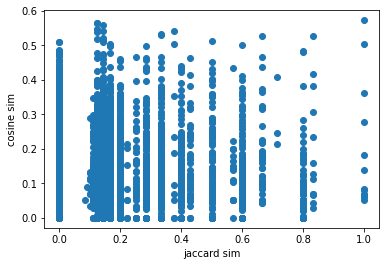

In [197]:
plt.scatter(movie_pairs_mat['jaccard_sim_score'],movie_pairs_mat['cosine_sim_score'])
plt.xlabel('jaccard sim')
plt.ylabel('cosine sim')

<AxesSubplot:>

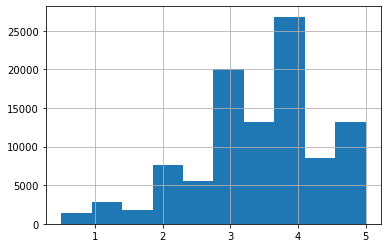

In [198]:
ratings['rating'].hist()

In [199]:
movie_pairs_mat['cumulative_score'] = movie_pairs_mat['jaccard_sim_score'] + movie_pairs_mat['cosine_sim_score']

In [200]:
movie_pairs_mat['cumulative_score'].fillna(0, inplace = True)

In [201]:
movie_pairs_mat = movie_pairs_mat.sort_values('cumulative_score', ascending = False)

In [202]:
movie_pairs_mat

,movieId1,movieId2,title,genres_list,jaccard_sim_score,cosine_sim_score,cumulative_score
2355,1,3114,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.000000,0.572601,1.572601
3568,1,4886,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.000000,0.504650,1.504650
3194,1,4306,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.833333,0.527977,1.361310
1706,1,2294,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.000000,0.360652,1.360652
4360,1,6377,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.800000,0.484297,1.284297
...,...,...,...,...,...,...,...
6188,1,44937,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.000000,0.000000
9324,1,160289,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.000000,0.000000
9326,1,160400,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.000000,0.000000
6189,1,44943,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.000000,0.000000,0.000000


In [203]:
to_suggest = list(movie_pairs_mat.head(5)['movieId2'])
to_suggest

[3114, 4886, 4306, 2294, 6377]

In [204]:
print('Suggested Movies:')
for movie in to_suggest:
    print(f"{movie}->{movie_ids_names_dict[movie]}")

Suggested Movies:
3114->Toy Story 2 (1999)
4886->Monsters, Inc. (2001)
4306->Shrek (2001)
2294->Antz (1998)
6377->Finding Nemo (2003)
